# Analysis of interacting case for optimal variational parameters

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from vmc.interface import *
from vmc import run_all

from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0

radius = 0.0043
beta = _lambda = 2.82843

num_particles = 10
num_dimensions = 3

step_length = 0.1

num_samples = int(2**16)
num_thermalization_steps = int(0.1*num_samples)

r_min = 0
r_max = 4
num_bins = 100


parameter_names = ["alpha"]
alpha = np.array([0.4974]).reshape(1, 1)

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps}

In [4]:
sampler_i = PySampler(
    PyInteractingEllipticalGaussian(
        num_particles, num_dimensions, mass, omega, beta, radius,
        spread=step_length
    ), PyEllipticalHarmonicOscillator(_lambda),
    PyImportanceMetropolis()
)

sampler_s = PySampler(
    PyInteractingEllipticalGaussian(
        num_particles, num_dimensions, mass, omega, beta, 0,
        spread=step_length
    ), PyEllipticalHarmonicOscillator(_lambda),
    PyImportanceMetropolis()
)

sampler_i.initialize_one_body_densities(r_min, r_max, num_bins)
sampler_s.initialize_one_body_densities(r_min, r_max, num_bins)

In [5]:
df_i = run_all(sampler_i, alpha, parameter_names, 0, **kwargs)

100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


In [6]:
display(df_i)

,alpha,energy,variance,std,acceptance,sampling_time,block_var,block_std
0,0.4974,24.396676,4.088863e-08,0.000202,0.961777,0.899579,0.000001,0.001218


In [7]:
df_s = run_all(sampler_s, alpha, parameter_names, 0, **kwargs)

100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


In [8]:
display(df_s)

,alpha,energy,variance,std,acceptance,sampling_time,block_var,block_std
0,0.4974,24.143889,2.187893e-08,0.000148,0.964127,0.878375,9.250103e-07,0.000962


In [9]:
bins_i = sampler_i.get_one_body_densities()
bins_s = sampler_s.get_one_body_densities()
radii = np.linspace(r_min, r_max, num_bins)

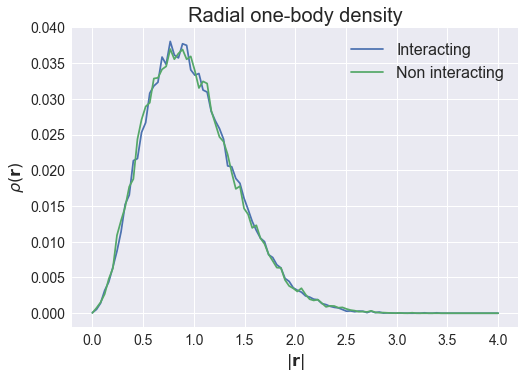

In [16]:
plt.plot(radii, bins_i, label=r"Interacting")
plt.plot(radii, bins_s, label=r"Non interacting")
plt.title(r"Radial one-body density", fontsize=20)
plt.xlabel(r"$|\mathbf{r}|$", fontsize=16)
plt.ylabel(r"$\rho(\mathbf{r})$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="best", fontsize=16)
plt.savefig("../data/figures/problem_g.pdf")
plt.show()